In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data Preparation

In [3]:
def PrepareStrings(strings):
    return strings.str.lower().str.replace(' ', '_')

df.columns = PrepareStrings(df.columns)

stringCols = df.dtypes[df.dtypes == 'object'].index
for col in stringCols:
    df[col] = PrepareStrings(df[col])
    df[col].unique()


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

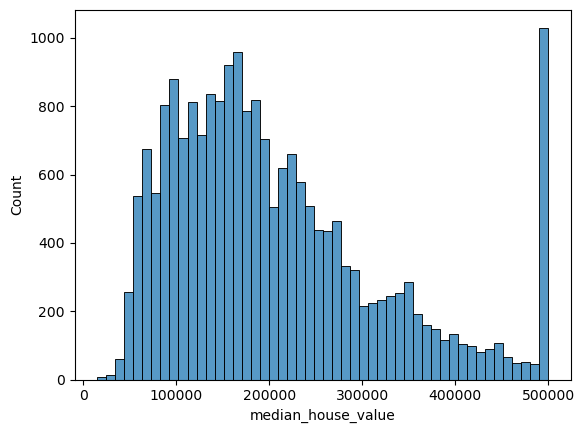

In [5]:
sns.histplot(df.median_house_value, bins=50)

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.population.median()

1166.0

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def PrepareStrings(strings):
    return strings.str.lower().str.replace(' ', '_')

def prepare_X(df):
    df.columns = PrepareStrings(df.columns)

    stringCols = df.dtypes[df.dtypes == 'object'].index
    for col in stringCols:
        df[col] = PrepareStrings(df[col])

    # convert categories to numbers
    X = pd.get_dummies(df)

    X = X.fillna(0)

    # normalize
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    return X

def validation_split(X, y, test_size = 0.2, val_size = 0.2):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

    return (X_train, X_test, X_val, y_train, y_test, y_val)

In [9]:
y = np.log1p(df.median_house_value)

dfX= df[['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income']]
X = prepare_X(dfX)

X_train, X_test, X_val, y_train, y_test, y_val = validation_split(X, y)

In [10]:
from LinReg_gradient_descent import LinearRegressionGD
from normal_equation import LinearRegressionNE
from sklearn.linear_model import Ridge
from gradient_descent import GradientDescent
from ridge import RidgeRegularization

def LR_GD(l=0.001, iter=5000, penalty=0.1):
    lr_gd = LinearRegressionGD(l, iter, penalty)
    lr_gd.fit(X_train, y_train)

    return lr_gd

def LR_NE(regularization=0.1):
    lr_ne = LinearRegressionNE(regularization)
    lr_ne.fit(X_train, y_train)

    return lr_ne

def LR_skt_ridge(l=0.001, iter=5000, penalty=0.1):
    rdg = Ridge(alpha = penalty, max_iter=iter, solver='sag')
    rdg.fit(X_train, y_train)

    return rdg

def LR_my_ridge(l=0.001, iter=5000, penalty=0.1):
    lr_ridge = GradientDescent(l, iter, RidgeRegularization(penalty))
    lr_ridge.fit(X_train, y_train)  

    return lr_ridge

ModuleNotFoundError: No module named 'LinReg_gradient_descent'

In [ ]:
def rmse(y_1, y_2):
    mse_val = np.mean((y_1 - y_2)**2)
    return np.sqrt(mse_val)

def plot_result(y_pred, y):
    rmse_res = rmse(y_pred, y)

    sns.histplot(y_pred, color='red', alpha=0.5, bins=20)
    pl = sns.histplot(y, color='blue', alpha=0.5, bins=20)
    pl.text(0, 0, "rmse="+ str(rmse_res))

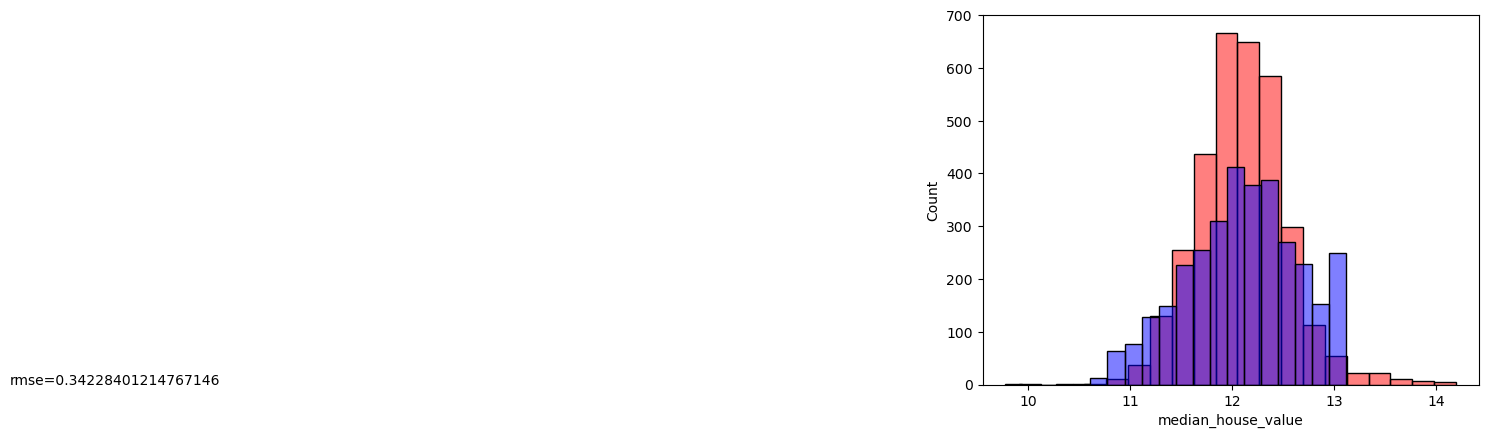

In [ ]:
lr_gd = LR_GD(1, 5000)
y_pred = lr_gd.predict(X_test)
plot_result(y_pred, y_test)

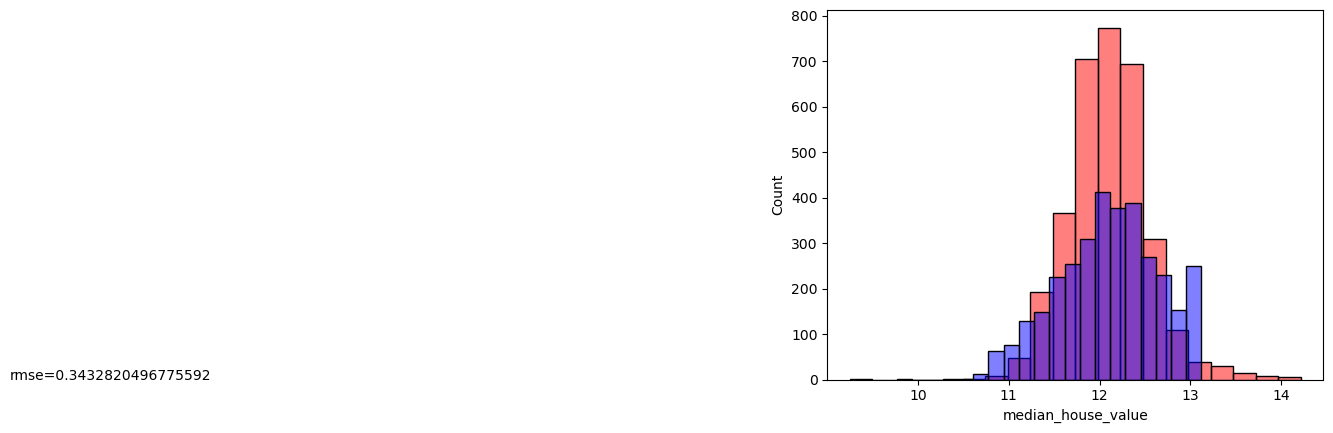

In [ ]:
lr_ne = LR_NE(1)
y_pred = lr_ne.predict(X_test)
plot_result(y_pred, y_test)

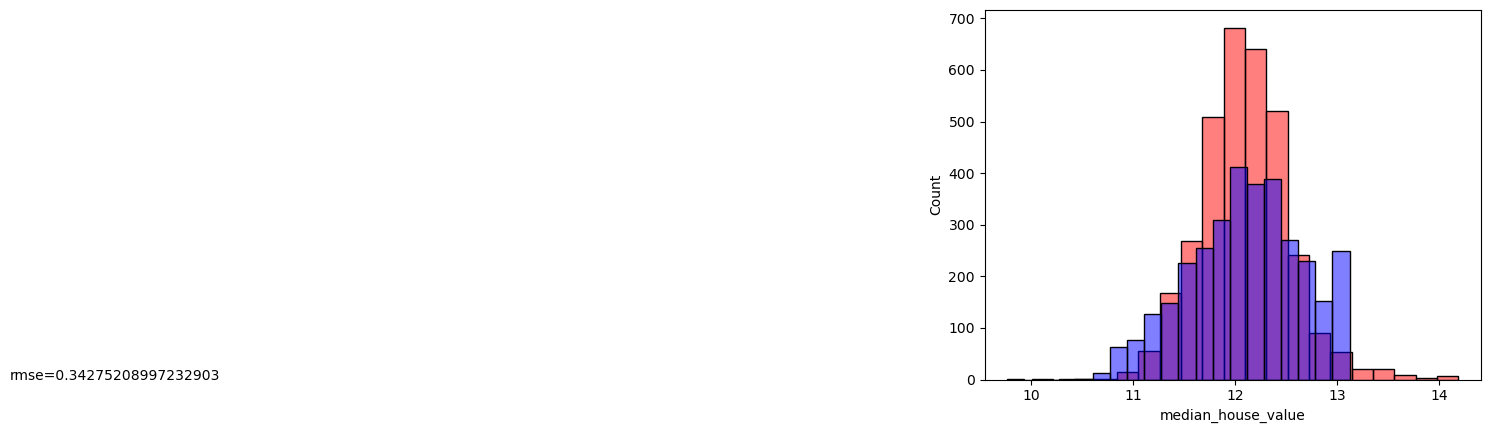

In [ ]:
lr_skt = LR_skt_ridge(1, 5000, 2)
y_pred = lr_skt.predict(X_test)
plot_result(y_pred, y_test)

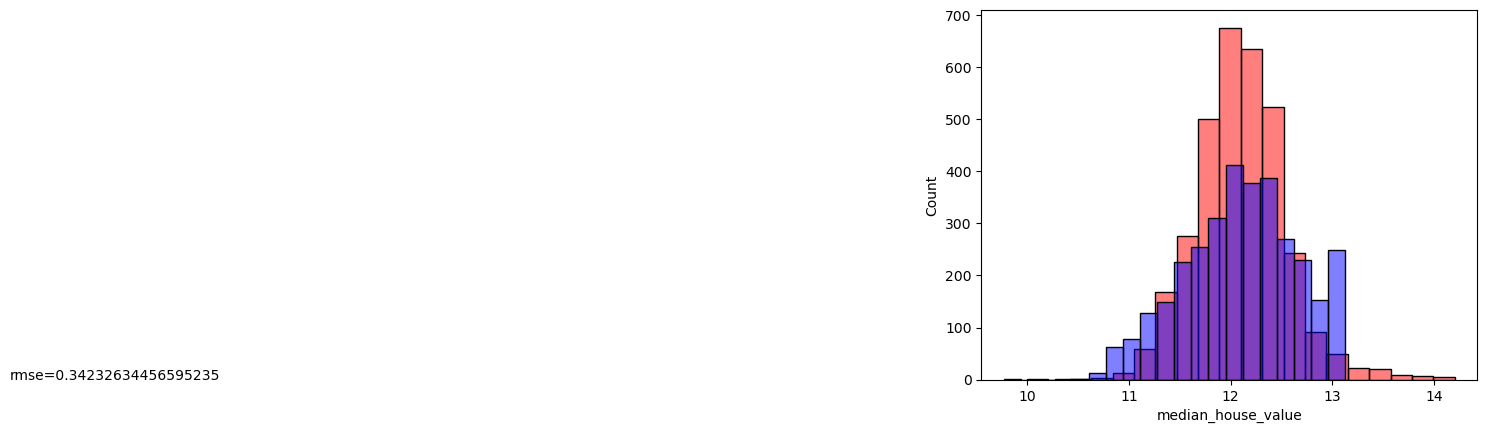

In [ ]:
lr_ridge = LR_my_ridge(1, 5000, 0.1)
y_pred = lr_ridge.predict(X_test)
plot_result(y_pred, y_test)

In [ ]:
rmse_l = {}
for i in [0, 0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    lr_ne = LR_NE(i)
    y_pred = lr_ne.predict(X_test)
    e = rmse(y_pred, y_test)
    rmse_l[i] = e

rmse_l

{0: 0.34903970176651794,
 1e-07: 0.3490397001718845,
 0.0001: 0.3490381073399599,
 0.001: 0.3490237762001352,
 0.01: 0.3488822973173824,
 0.1: 0.34763375993816165,
 1: 0.3432820496775592,
 5: 0.35164157446952227,
 10: 0.3677100995755788}

4) 1 seems to be the best

In [ ]:
np.round(np.std(list(rmse_l.values())),3)

0.006

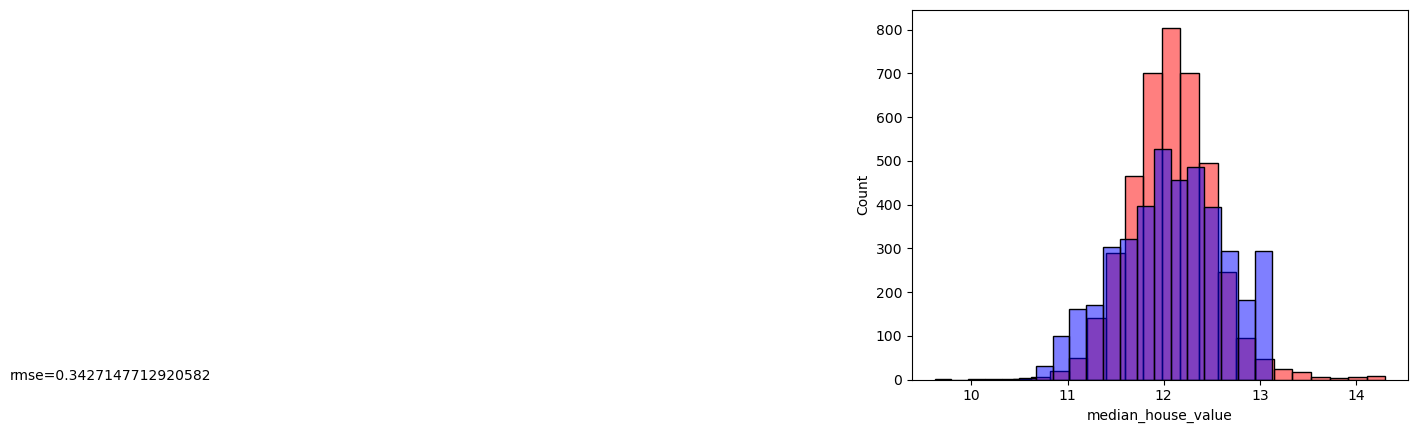

In [ ]:
lr_ne = LR_NE(1)
y_pred = lr_ne.predict(X_val)
plot_result(y_pred, y_val)

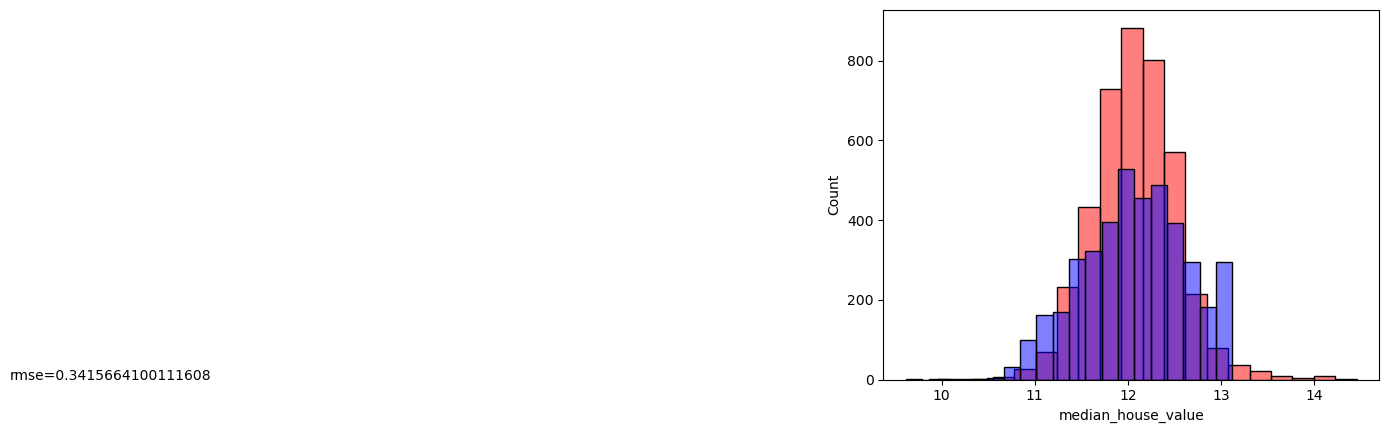

In [ ]:
lr_skt = LR_skt_ridge(0.01, 5000, 0.01)
y_pred = lr_skt.predict(X_val)
plot_result(y_pred, y_val)

In [ ]:
from gradient_descent import GradientDescent
from ridge import RidgeRegularization

def run_ridge_lin_reg(l=0.001, iter=5000, penalty=0.1):
    lr_ridge = GradientDescent(l, iter, RidgeRegularization(penalty))
    lr_ridge.fit(X_train, y_train)  

    y_pred = lr_ridge.predict(X_test)

    return y_pred